# Import

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from scipy import stats

import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams["font.size"] = 20

# Read Data

In [3]:
qm9 = pd.read_csv("qm_ext_plus.csv")
qm9.index = qm9["Unnamed: 0"]
qm9.drop(columns=["Unnamed: 0"], inplace=True)
qm9["mol"] = qm9["smiles"].apply(Chem.MolFromSmiles)

In [4]:
qm9.dropna()

,smiles,mu,alpha,homo,lumo,gap,zpve,cv,u0,u298,h298,g298,num_atoms,mol
Unnamed: 0,,,,,,,,,,,,,,
0,C,0.0000,13.210000,-0.387700,0.117100,0.504800,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597,1,<rdkit.Chem.rdchem.Mol object at 0x7f2833992560>
1,N,1.6256,9.460000,-0.257000,0.082900,0.339900,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961,1,<rdkit.Chem.rdchem.Mol object at 0x7f2833992680>
2,O,1.8511,6.310000,-0.292800,0.068700,0.361500,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349,1,<rdkit.Chem.rdchem.Mol object at 0x7f2833992800>
3,C#C,0.0000,16.280000,-0.284500,0.050600,0.335100,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429,2,<rdkit.Chem.rdchem.Mol object at 0x7f2833992260>
4,C#N,2.8937,12.990000,-0.360400,0.019100,0.379600,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246,2,<rdkit.Chem.rdchem.Mol object at 0x7f2833991f00>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155584,CCCCCC(Cl)(Cl)Cl,1.6998,91.438949,-0.437290,0.151861,0.589151,0.160407,39.627,-1612.899018,-1615.123029,-1612.726294,-1612.777780,9,<rdkit.Chem.rdchem.Mol object at 0x7f2831f66800>
155585,CCCNCC(Cl)(Cl)Cl,1.0758,88.241518,-0.375428,0.153217,0.528645,0.149152,39.102,-1628.886186,-1631.151460,-1628.724865,-1628.775694,9,<rdkit.Chem.rdchem.Mol object at 0x7f2831f66860>
155586,CCCOCC(Cl)(Cl)Cl,5.6070,83.982178,-0.429966,0.153852,0.583818,0.136714,37.858,-1648.698216,-1651.009167,-1648.549519,-1648.600105,9,<rdkit.Chem.rdchem.Mol object at 0x7f2831f668c0>


In [5]:
db_conf = pd.read_parquet("db_conf.parquet")
db_conf.index = db_conf["db_idx"]
db_conf.drop(columns=["Unnamed: 0", "db_idx"], inplace=True)
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
# db_conf.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClBrI"], inplace=True)

In [6]:
na_ind = db_conf[db_conf.iloc[:,4:-1].isna().all(axis=1)].index

In [7]:
db_conf = db_conf.drop(index=na_ind)
db_conf = db_conf.reset_index(drop=True)

# Labels Encoding

In [8]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
le.fit(["nB", "B"])
db_conf["class_encoded"] = le.transform(db_conf["Experimental BCF class"])

In [10]:
db_conf["class_encoded"] = db_conf["class_encoded"].replace({1:0, 0:1})

In [11]:
db_conf

,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol,class_encoded
0,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7f282fec6ce0>,0
1,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7f282fec72e0>,1
2,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7f28334f75e0>,0
3,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135441],None,<rdkit.Chem.rdchem.Mol object at 0x7f28334f74c0>,0
4,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7f28334f7460>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135086, 135404, 135405]",[145115],<rdkit.Chem.rdchem.Mol object at 0x7f28334e3b20>,0
835,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134378, 134382, 135441]",[137748],<rdkit.Chem.rdchem.Mol object at 0x7f28334e3b80>,1
836,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7f28334e3be0>,0
837,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7f28334e3c40>,0


In [12]:
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
db_conf["num_atoms"] = db_conf["mol"].apply(lambda x: x.GetNumAtoms())

# Calculate FQDs

In [13]:
db_conf_filled = db_conf.copy()

In [14]:
qprops = "mu,alpha,homo,lumo,gap,zpve,u0,u298,h298,g298,cv".split(",")

In [15]:
import statistics
def calculate_FQDs(indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        ret.append(patterns_db[quantum_property][i])
    return statistics.mean(ret)

def calculate_FQDs_quant(mol, indices, patterns_db, quantum_property):
    if isinstance(indices, int) and indices == 0:
        return np.NaN
    if indices is None:
        return np.NaN
    ret = []
    for i in indices:
        n_occurences = len(list(mol.GetSubstructMatch(patterns_db["mol"][i])))
        ret.append(patterns_db[quantum_property][i] * n_occurences)
    return statistics.mean(ret)

In [16]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}"] = db_conf_filled[f"FQD_{num}"].apply(calculate_FQDs, patterns_db=qm9, quantum_property=prop)

In [17]:
# for prop in qprops:
#     for num in range(2, 10):
#         db_conf_filled[f"FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

# Quant FQDs

In [18]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}"] = db_conf_filled["mol"].apply(lambda x: calculate_FQDs_quant(x,
                                                                          indices=db_conf_filled[db_conf_filled["mol"]==x][f"FQD_{num}"].iloc[0],
                                                                          patterns_db=qm9,
                                                                          quantum_property=prop)
                                                                         )

In [19]:
for prop in qprops:
    for num in range(2, 10):
        db_conf_filled[f"quant_FQD_{num}_{prop}_per_atom"] = db_conf_filled[f"quant_FQD_{num}_{prop}"] / db_conf_filled["num_atoms"]

In [20]:
import itertools
fqd_cols_qual = []
for num, prop in itertools.product(range(2,10), qprops):
    fqd_cols_qual.append(f"FQD_{num}_{prop}")
fqd_cols_qual_per_atom = [f"{x}_per_atom" for x in fqd_cols_qual]
quant_fqd_cols = [f"quant_{x}" for x in fqd_cols_qual]
quant_fqd_cols_per_atom = [f"quant_{x}" for x in fqd_cols_qual_per_atom]

In [21]:
db_conf_filled.columns[14:]

Index(['quant_FQD_2_mu', 'quant_FQD_3_mu', 'quant_FQD_4_mu', 'quant_FQD_5_mu',
       'quant_FQD_6_mu', 'quant_FQD_7_mu', 'quant_FQD_8_mu', 'quant_FQD_9_mu',
       'quant_FQD_2_alpha', 'quant_FQD_3_alpha',
       ...
       'quant_FQD_8_g298_per_atom', 'quant_FQD_9_g298_per_atom',
       'quant_FQD_2_cv_per_atom', 'quant_FQD_3_cv_per_atom',
       'quant_FQD_4_cv_per_atom', 'quant_FQD_5_cv_per_atom',
       'quant_FQD_6_cv_per_atom', 'quant_FQD_7_cv_per_atom',
       'quant_FQD_8_cv_per_atom', 'quant_FQD_9_cv_per_atom'],
      dtype='object', length=176)

In [22]:
cols = db_conf_filled.columns[14:]

# Fill with zeros

In [23]:
nan_cols = db_conf.iloc[:,3:11].isna()

In [24]:
x = db_conf_filled[cols].fillna(0)
y = db_conf_filled["class_encoded"]

In [25]:
nan_cols_colnames = [f"{x}_nan" for x in nan_cols]
nan_cols.columns = nan_cols_colnames
nan_cols

,FQD_2_nan,FQD_3_nan,FQD_4_nan,FQD_5_nan,FQD_6_nan,FQD_7_nan,FQD_8_nan,FQD_9_nan
0,False,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,True
4,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...
834,False,True,True,True,False,False,False,False
835,False,True,True,True,False,False,False,False
836,False,False,False,False,False,False,False,False
837,False,False,False,False,False,False,False,False


In [26]:
x = pd.concat([x, nan_cols], axis=1)
x

,quant_FQD_2_mu,quant_FQD_3_mu,quant_FQD_4_mu,quant_FQD_5_mu,quant_FQD_6_mu,quant_FQD_7_mu,quant_FQD_8_mu,quant_FQD_9_mu,quant_FQD_2_alpha,quant_FQD_3_alpha,...,quant_FQD_8_cv_per_atom,quant_FQD_9_cv_per_atom,FQD_2_nan,FQD_3_nan,FQD_4_nan,FQD_5_nan,FQD_6_nan,FQD_7_nan,FQD_8_nan,FQD_9_nan
0,0.000000,0.0000,0.00000,0.000000,0.000000,6.848800,13.020800,14.40630,47.900000,0.00,...,25.429333,34.071000,False,True,True,True,False,False,False,False
1,1.525800,2.6230,3.80990,8.173250,7.871760,5.880933,4.931733,12.29910,40.920000,90.75,...,8.696556,11.601875,False,False,False,False,False,False,False,False
2,0.000000,0.1791,0.00000,0.301500,0.000000,0.422100,0.000000,0.54180,47.900000,104.25,...,13.616348,17.217000,False,False,False,False,False,False,False,False
3,0.000000,0.0000,0.00000,0.000000,0.000000,-0.000700,-21.363200,0.00000,0.000000,0.00,...,24.767000,0.000000,True,True,True,True,False,False,False,True
4,0.000000,0.0000,0.00000,0.000000,0.000000,11.422600,9.324000,39.49380,0.000000,0.00,...,23.248000,23.053500,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.000000,0.0000,0.00000,0.000000,-3.479100,-10.527475,-11.717333,16.39350,47.900000,0.00,...,23.407333,30.375750,False,True,True,True,False,False,False,False
835,0.000000,0.0000,0.00000,0.000000,0.000000,1.137150,-18.736800,-27.43740,47.900000,0.00,...,16.680667,21.668250,False,True,True,True,False,False,False,False
836,2.423133,4.0410,5.00385,9.239357,9.384406,12.560830,15.701759,18.30079,36.733333,87.73,...,8.633506,10.959239,False,False,False,False,False,False,False,False
837,2.108900,6.3565,14.68760,18.250833,17.415000,21.800975,20.810000,21.11280,38.130000,81.43,...,18.348571,20.109643,False,False,False,False,False,False,False,False


# OOB dataset creation

In [27]:
from sklearn.utils import resample

In [28]:
res_x, res_y = resample(x.reset_index(drop=True), y.reset_index(drop=True), replace=False, n_samples=526, stratify=y, random_state=1)
oob_idx = set(x.index).difference(set(res_x.index))

In [29]:
len(oob_idx)

313

In [30]:
oob_x, oob_y = x.loc[list(oob_idx)], y.loc[list(oob_idx)]

In [31]:
x, y = res_x, res_y

In [32]:
y.value_counts()

0    409
1    117
Name: class_encoded, dtype: int64

In [33]:
oob_y.value_counts()

0    244
1     69
Name: class_encoded, dtype: int64

In [34]:
np.savetxt("oob_idx", np.array(list(oob_idx)))

In [35]:
np.savetxt("train_idx", res_x.index)

# Modelling

# Pipeline creation

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import lightgbm as lgb

In [44]:
scor_dict = {"algorithm": [],
            "balanced_accuracy": [],
            "f1 score": []}

In [45]:
from sklearn.model_selection import StratifiedKFold

def my_score(model, n_folds, scoring_callable, X, Y):
    scores = [],[]
    cv = StratifiedKFold(n_folds)
    oversampler = RandomOverSampler(random_state=1)
    preprocessor = ColumnTransformer(
        [("prep", Pipeline([
            ("scaler", StandardScaler()),
        ]),
                                     cols)], remainder="passthrough")

    for train_index, validation_index in cv.split(X, Y):
        # balancing, preprocessing, fitting and predicting
        x, y = X.iloc[train_index], Y.iloc[train_index]
        xx, yy = oversampler.fit_resample(x, y)
        xx = preprocessor.fit_transform(xx)
        model.fit(xx, yy)
        x_val = X.iloc[validation_index]
        x_val = preprocessor.transform(x_val)
        score_bac = scoring_callable[0](Y.iloc[validation_index], model.predict(x_val))
        score_f = scoring_callable[1](Y.iloc[validation_index], model.predict(x_val))
        
        print(f"bac: {score_bac}, f1: {score_f}")
        scores[0].append(score_bac)
        scores[1].append(score_f)
    
    return scores

### Baseline

In [46]:
scor_dict["algorithm"].extend(["Baseline"]*5)

In [47]:
dum = DummyClassifier(strategy="uniform", random_state=1)

In [48]:
scores = my_score(dum, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.41565040650406504, f1: 0.2439024390243903
bac: 0.46604938271604934, f1: 0.2926829268292683
bac: 0.5082184517497349, f1: 0.32098765432098764
bac: 0.4247083775185578, f1: 0.24691358024691357
bac: 0.591728525980912, f1: 0.3950617283950617


In [49]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [50]:
scor_dict["f1 score"].extend(list(scores[1]))

### LogClf

In [51]:
scor_dict["algorithm"].extend(["Logistic Regression"]*5)

In [52]:
reg = LogisticRegression(max_iter=100000)

In [53]:
scores = my_score(reg, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.8033536585365854, f1: 0.6268656716417911
bac: 0.8449074074074074, f1: 0.7000000000000001
bac: 0.7319724284199364, f1: 0.5517241379310345
bac: 0.753711558854719, f1: 0.5762711864406781
bac: 0.8024920466595971, f1: 0.6666666666666666


In [54]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [55]:
scor_dict["f1 score"].extend(list(scores[1]))

### Rand Forest

In [56]:
scor_dict["algorithm"].extend(["Random Forest"]*5)

In [57]:
clf = RandomForestClassifier(
            n_estimators=1000,
            max_features=0.3,
            random_state=1
)

In [58]:
scores = my_score(clf, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.8373983739837398, f1: 0.7017543859649124
bac: 0.8024691358024691, f1: 0.7111111111111111
bac: 0.7590137857900319, f1: 0.6122448979591837
bac: 0.7303817603393425, f1: 0.6
bac: 0.693001060445387, f1: 0.5405405405405405


In [59]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [60]:
scor_dict["f1 score"].extend(list(scores[1]))

### Grad Boosting

In [61]:
scor_dict["algorithm"].extend(["Gradient Boosting"]*5)

In [62]:
gbc = GradientBoostingClassifier(
            n_estimators=1000,
            max_features=0.3,
            random_state = 1,
)

In [63]:
scores = my_score(gbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7566056910569106, f1: 0.5964912280701754
bac: 0.7816358024691358, f1: 0.6818181818181818
bac: 0.7990455991516436, f1: 0.6808510638297872
bac: 0.7460233297985154, f1: 0.6190476190476191
bac: 0.6434252386002121, f1: 0.4444444444444444


In [64]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [65]:
scor_dict["f1 score"].extend(list(scores[1]))

### KNN

In [66]:
scor_dict["algorithm"].extend(["KNN"]*5)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knc = KNeighborsClassifier()

In [69]:
scores = my_score(knc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7032520325203252, f1: 0.5063291139240507
bac: 0.7662037037037037, f1: 0.5937499999999999
bac: 0.6866383881230116, f1: 0.4857142857142858
bac: 0.7049310710498409, f1: 0.5074626865671641
bac: 0.6762990455991517, f1: 0.48275862068965525


In [70]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [71]:
scor_dict["f1 score"].extend(list(scores[1]))

### SVC

In [72]:
scor_dict["algorithm"].extend(["SVC"]*5)

In [73]:
from sklearn.svm import SVC

In [74]:
svc = SVC(kernel="poly", degree=4)

In [75]:
scores = my_score(svc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.6951219512195121, f1: 0.5333333333333333
bac: 0.742283950617284, f1: 0.6086956521739131
bac: 0.7616648992576882, f1: 0.6363636363636365
bac: 0.6407741251325557, f1: 0.4390243902439025
bac: 0.6407741251325557, f1: 0.4390243902439025


In [76]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [77]:
scor_dict["f1 score"].extend(list(scores[1]))

### XGBoost

In [78]:
scor_dict["algorithm"].extend(["XGBoost"]*5)

In [79]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=1)

In [80]:
scores = my_score(xgbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7713414634146342, f1: 0.6101694915254237
bac: 0.8233024691358024, f1: 0.7391304347826088
bac: 0.7616648992576882, f1: 0.6363636363636365
bac: 0.718186638388123, f1: 0.5714285714285715
bac: 0.6773594909862142, f1: 0.5142857142857143


In [81]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [82]:
scor_dict["f1 score"].extend(list(scores[1]))

### Light GBM

In [83]:
scor_dict["algorithm"].extend(["Light GBM"]*5)

In [84]:
lgbc = lgb.LGBMClassifier(n_estimators=1000, random_state=1)

In [85]:
scores = my_score(lgbc, 5, [balanced_accuracy_score, f1_score], x, y)

bac: 0.7688008130081301, f1: 0.6181818181818182
bac: 0.8024691358024691, f1: 0.7111111111111111
bac: 0.8112407211028632, f1: 0.711111111111111
bac: 0.7303817603393425, f1: 0.6
bac: 0.6060445387062566, f1: 0.36363636363636365


In [86]:
scor_dict["balanced_accuracy"].extend(list(scores[0]))

In [87]:
scor_dict["f1 score"].extend(list(scores[1]))

### Scores vis

In [88]:
scors = pd.DataFrame(scor_dict)
scors

,algorithm,balanced_accuracy,f1 score
0,Baseline,0.415650,0.243902
1,Baseline,0.466049,0.292683
2,Baseline,0.508218,0.320988
3,Baseline,0.424708,0.246914
4,Baseline,0.591729,0.395062
5,Logistic Regression,0.803354,0.626866
6,Logistic Regression,0.844907,0.700000
7,Logistic Regression,0.731972,0.551724
8,Logistic Regression,0.753712,0.576271
9,Logistic Regression,0.802492,0.666667


In [89]:
scors.to_csv("scors_zeros_imp.csv")

In [90]:
scors.groupby(["algorithm"]).mean().to_csv("groupby_zeros_marked2.csv")

In [91]:
scors.groupby(["algorithm"]).mean()

,balanced_accuracy,f1 score
algorithm,,
Baseline,0.481271,0.299910
Gradient Boosting,0.745347,0.604531
KNN,0.707465,0.515203
Light GBM,0.743787,0.600808
Logistic Regression,0.787287,0.624306
Random Forest,0.764453,0.633130
SVC,0.696124,0.531288
XGBoost,0.750371,0.614276


In [92]:
scors.groupby(["algorithm"]).median()

,balanced_accuracy,f1 score
algorithm,,
Baseline,0.466049,0.292683
Gradient Boosting,0.756606,0.619048
KNN,0.703252,0.506329
Light GBM,0.768801,0.618182
Logistic Regression,0.802492,0.626866
Random Forest,0.759014,0.612245
SVC,0.695122,0.533333
XGBoost,0.761665,0.610169


In [93]:
melted = scors.melt(id_vars="algorithm", var_name="metric")
melted

,algorithm,metric,value
0,Baseline,balanced_accuracy,0.415650
1,Baseline,balanced_accuracy,0.466049
2,Baseline,balanced_accuracy,0.508218
3,Baseline,balanced_accuracy,0.424708
4,Baseline,balanced_accuracy,0.591729
...,...,...,...
75,Light GBM,f1 score,0.618182
76,Light GBM,f1 score,0.711111
77,Light GBM,f1 score,0.711111
78,Light GBM,f1 score,0.600000


In [94]:
melted.groupby(by=["algorithm","metric"]).apply(lambda x: np.percentile(x, [75, 50, 25]).sum()/3)

algorithm            metric           
Baseline             balanced_accuracy    0.466325
                     f1 score             0.286861
Gradient Boosting    balanced_accuracy    0.761422
                     f1 score             0.632130
KNN                  balanced_accuracy    0.698274
                     f1 score             0.499835
Light GBM            balanced_accuracy    0.767217
                     f1 score             0.643098
Logistic Regression  balanced_accuracy    0.786519
                     f1 score             0.623268
Random Forest        balanced_accuracy    0.763955
                     f1 score             0.638000
SVC                  balanced_accuracy    0.692727
                     f1 score             0.527018
XGBoost              balanced_accuracy    0.750398
                     f1 score             0.605987
dtype: float64

<AxesSubplot:xlabel='algorithm', ylabel='value'>

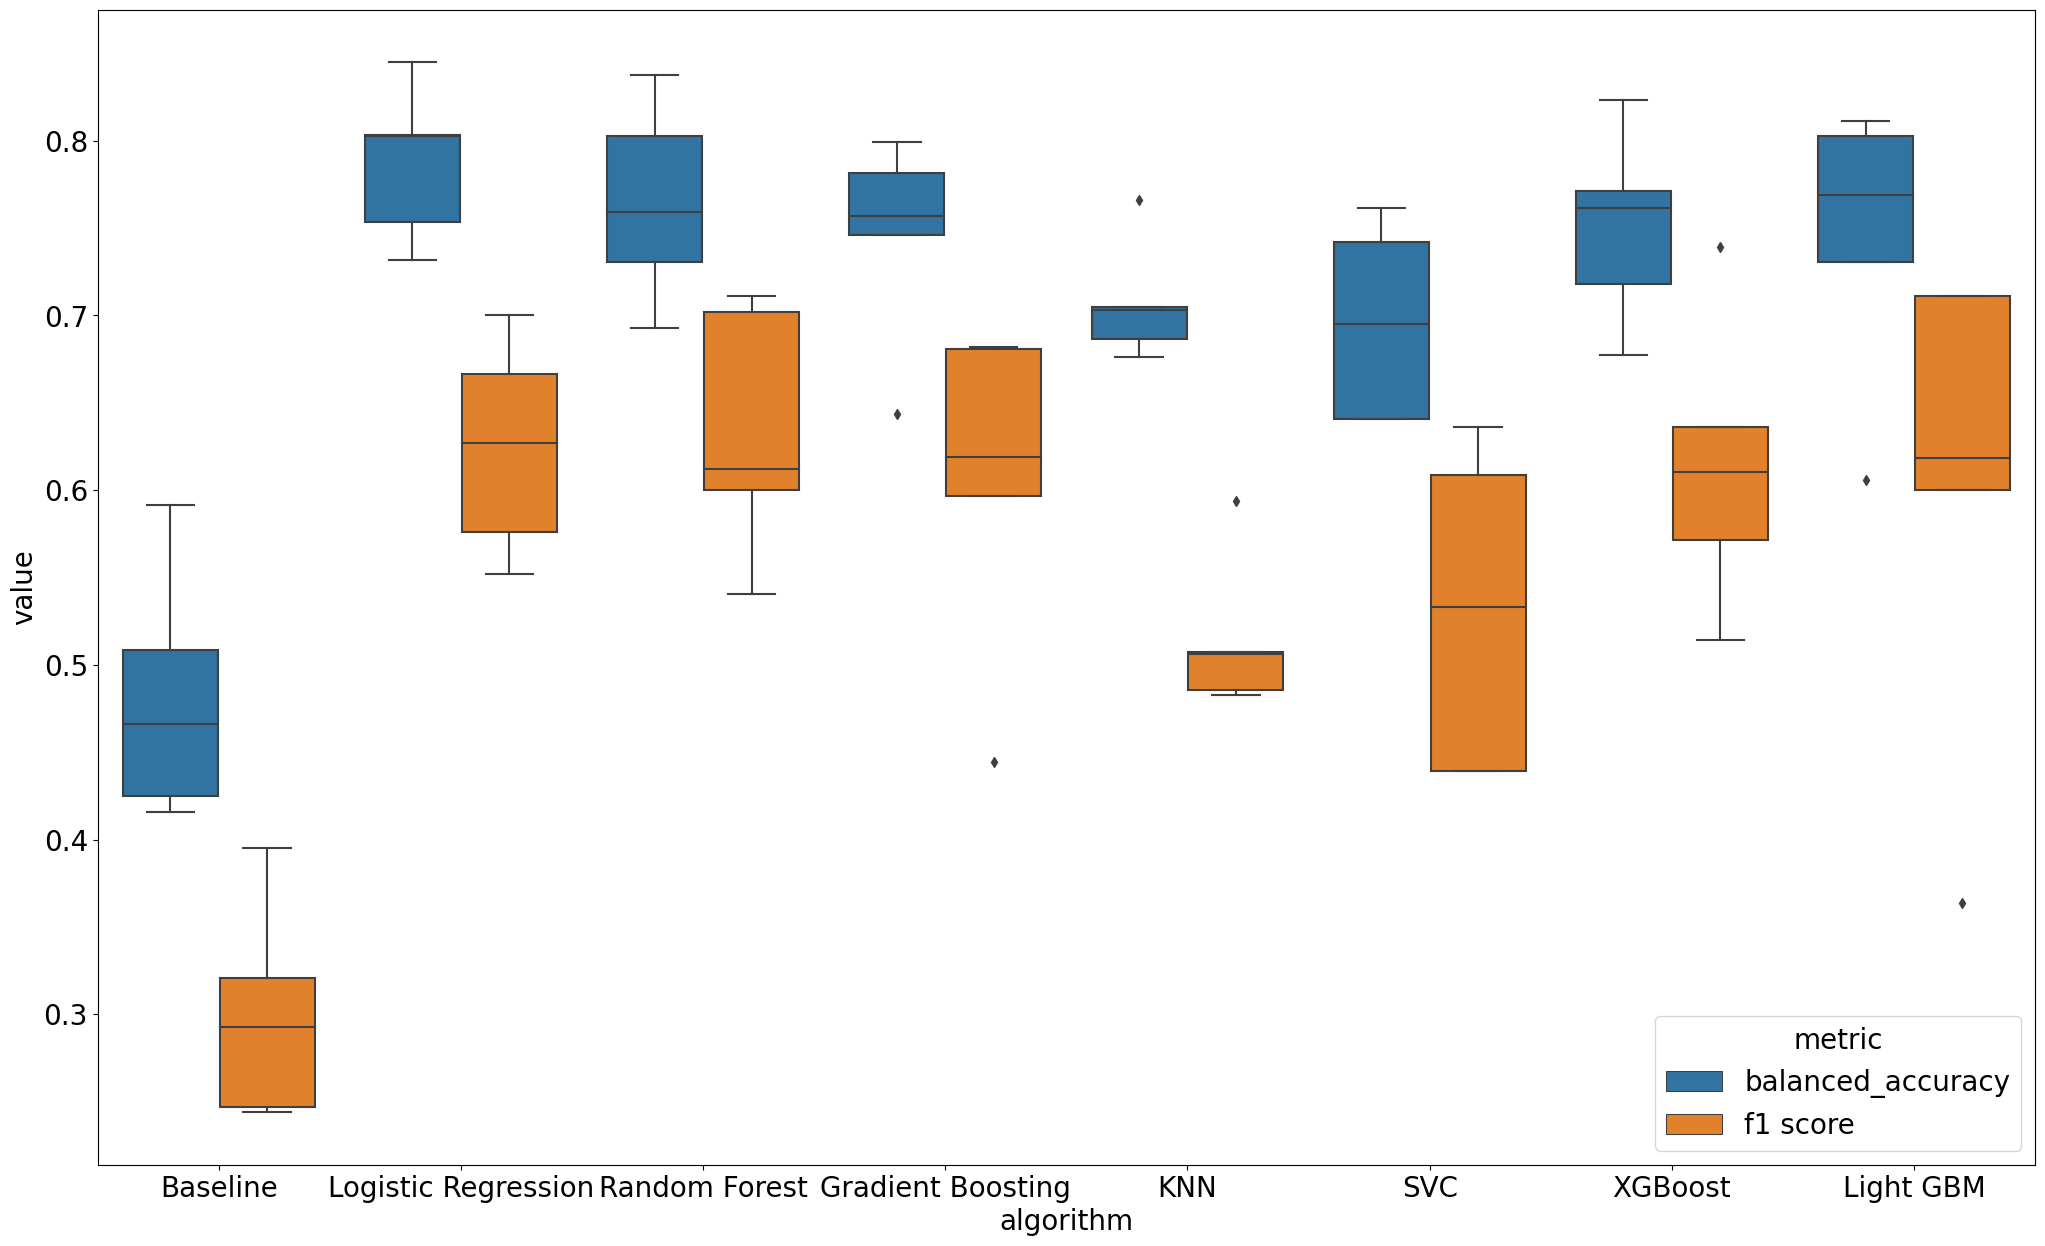

In [95]:
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="algorithm", y="value", data=melted, hue="metric", ax=ax, meanline=True)

Text(0, 0.5, '')

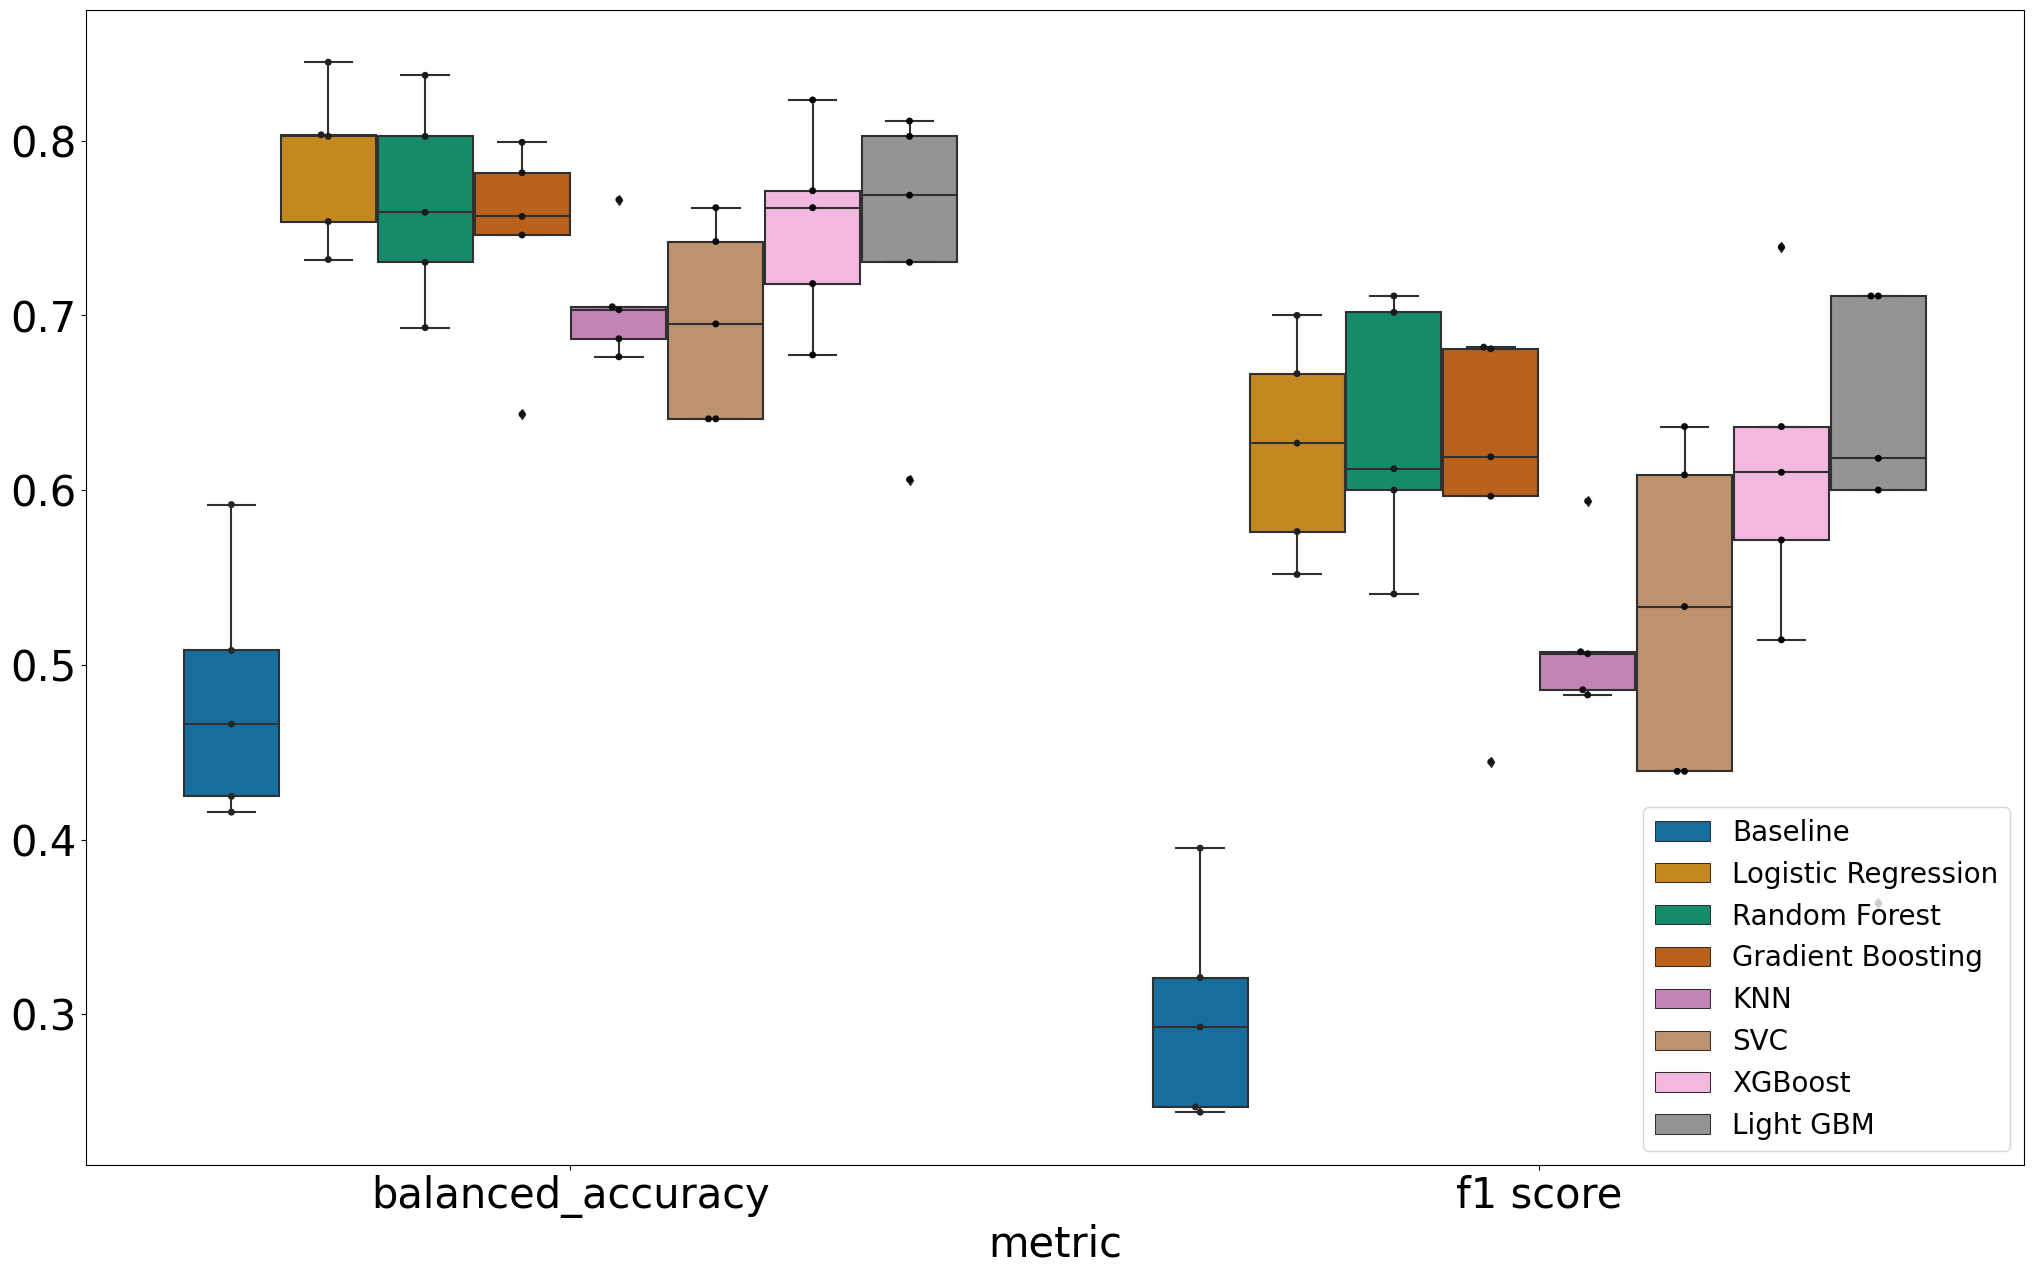

In [96]:
rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, palette="colorblind")
sns.swarmplot(x="metric", y="value", data=melted, hue="algorithm", ax=ax, dodge=True, color="k")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:8], labels[:8], fontsize=20)
ax.set_ylabel(None)

In [97]:
fig.savefig("cv_res_fqd.pdf")

# PCA features analysis

In [99]:
xx = x[cols]
yy = y

In [100]:
rcParams["font.size"] = 40

In [101]:
scaler = StandardScaler()
xx = scaler.fit_transform(xx)
oob_x = scaler.transform(oob_x[cols])

In [102]:
xx = pca.fit_transform(xx)
oob_x = pca.transform(oob_x)

In [103]:
loading_scores = pd.Series(pca.components_[0], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_4_gap               0.129750
quant_FQD_4_zpve              0.129245
quant_FQD_4_alpha             0.129209
quant_FQD_4_cv                0.129000
quant_FQD_4_g298_per_atom     0.128967
quant_FQD_4_u0_per_atom       0.128967
quant_FQD_4_u298_per_atom     0.128967
quant_FQD_4_h298_per_atom     0.128967
quant_FQD_4_homo              0.128902
quant_FQD_4_cv_per_atom       0.128383
quant_FQD_4_homo_per_atom     0.128065
quant_FQD_4_alpha_per_atom    0.127556
quant_FQD_4_gap_per_atom      0.127343
quant_FQD_4_zpve_per_atom     0.126045
quant_FQD_4_lumo              0.124204
quant_FQD_4_g298              0.123272
quant_FQD_4_u0                0.123271
quant_FQD_4_u298              0.123271
quant_FQD_4_h298              0.123271
quant_FQD_5_zpve              0.121819
quant_FQD_3_cv                0.120632
quant_FQD_3_alpha             0.120503
quant_FQD_4_lumo_per_atom     0.120299
quant_FQD_3_homo              0.120074
quant_FQD_3_gap               0.119990
quant_FQD_5_cv           

In [104]:
loading_scores = pd.Series(pca.components_[1], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_8_homo_per_atom     0.150824
quant_FQD_8_gap_per_atom      0.145281
quant_FQD_8_alpha_per_atom    0.145278
quant_FQD_8_cv_per_atom       0.142841
quant_FQD_7_g298              0.135449
quant_FQD_7_u0                0.135446
quant_FQD_7_h298              0.135446
quant_FQD_7_u298              0.135434
quant_FQD_8_homo              0.135360
quant_FQD_7_g298_per_atom     0.134771
quant_FQD_7_u0_per_atom       0.134769
quant_FQD_7_h298_per_atom     0.134769
quant_FQD_7_u298_per_atom     0.134761
quant_FQD_7_homo_per_atom     0.134062
quant_FQD_7_homo              0.131274
quant_FQD_8_gap               0.130308
quant_FQD_8_alpha             0.130057
quant_FQD_7_gap_per_atom      0.130029
quant_FQD_8_g298              0.129476
quant_FQD_8_u0                0.129474
quant_FQD_8_h298              0.129473
quant_FQD_8_u298              0.129462
quant_FQD_9_homo_per_atom     0.127814
quant_FQD_7_alpha_per_atom    0.126645
quant_FQD_9_alpha_per_atom    0.126346
quant_FQD_9_gap_per_atom 

In [105]:
loading_scores = pd.Series(pca.components_[2], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_2_gap_per_atom      0.198516
quant_FQD_2_cv_per_atom       0.198030
quant_FQD_2_zpve_per_atom     0.197706
quant_FQD_2_lumo_per_atom     0.196865
quant_FQD_2_alpha_per_atom    0.196634
quant_FQD_2_homo_per_atom     0.195073
quant_FQD_2_g298_per_atom     0.178868
quant_FQD_2_u0_per_atom       0.178863
quant_FQD_2_u298_per_atom     0.178862
quant_FQD_2_h298_per_atom     0.178861
quant_FQD_2_lumo              0.114464
quant_FQD_6_homo_per_atom     0.112750
quant_FQD_3_zpve_per_atom     0.112161
quant_FQD_3_alpha_per_atom    0.110677
quant_FQD_3_gap_per_atom      0.110603
quant_FQD_3_homo_per_atom     0.109210
quant_FQD_3_cv_per_atom       0.109011
quant_FQD_6_alpha_per_atom    0.108815
quant_FQD_6_gap_per_atom      0.107688
quant_FQD_5_mu                0.107156
quant_FQD_3_lumo_per_atom     0.106004
quant_FQD_4_mu                0.102905
quant_FQD_9_cv                0.101929
quant_FQD_5_g298              0.100299
quant_FQD_5_u0                0.100297
quant_FQD_5_h298         

In [106]:
loading_scores = pd.Series(pca.components_[3], index=cols)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
print(sorted_loading_scores[:40])

quant_FQD_6_gap_per_atom      0.152787
quant_FQD_6_cv_per_atom       0.149413
quant_FQD_2_h298              0.148075
quant_FQD_2_u298              0.148075
quant_FQD_2_u0                0.148074
quant_FQD_2_g298              0.148073
quant_FQD_6_zpve_per_atom     0.145038
quant_FQD_6_homo_per_atom     0.136692
quant_FQD_6_alpha_per_atom    0.133761
quant_FQD_6_lumo_per_atom     0.132863
quant_FQD_7_lumo_per_atom     0.121223
quant_FQD_2_homo              0.119506
quant_FQD_2_mu                0.117034
quant_FQD_2_cv                0.116495
quant_FQD_3_h298              0.111452
quant_FQD_3_u298              0.111452
quant_FQD_3_u0                0.111452
quant_FQD_3_g298              0.111450
quant_FQD_6_gap               0.109623
quant_FQD_3_mu                0.108227
quant_FQD_6_g298_per_atom     0.108089
quant_FQD_6_u0_per_atom       0.108084
quant_FQD_6_h298_per_atom     0.108084
quant_FQD_6_u298_per_atom     0.108043
quant_FQD_5_gap_per_atom      0.108023
quant_FQD_2_gap          

## Check which fragments are most important by atoms count

In [107]:
import itertools
from collections import Counter
keys = [f"PC{i}" for i in range(1,8)]
pc_dict = {k: None for k in keys}
pc_props_whole = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=cols)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in [f"{j}" for j in range(1,10)]]
    pc_dict[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole += PC_props

pc_dict

{'PC1': Counter({'4': 20, '5': 10, '3': 10}),
 'PC2': Counter({'8': 17, '7': 15, '9': 8}),
 'PC3': Counter({'2': 12, '6': 6, '3': 10, '5': 6, '4': 1, '9': 5}),
 'PC4': Counter({'6': 13, '2': 9, '7': 4, '3': 6, '5': 6, '9': 2}),
 'PC5': Counter({'6': 9, '9': 8, '5': 6, '7': 5, '2': 7, '8': 5}),
 'PC6': Counter({'6': 10,
          '3': 3,
          '9': 7,
          '2': 3,
          '8': 3,
          '7': 10,
          '5': 2,
          '4': 2}),
 'PC7': Counter({'7': 2,
          '8': 5,
          '9': 2,
          '5': 10,
          '2': 6,
          '6': 2,
          '3': 9,
          '4': 4})}

In [108]:
Counter(pc_props_whole).most_common(5)

[('5', 40), ('6', 40), ('3', 38), ('2', 37), ('7', 36)]

## Check which fragments are most important by quantum feature

In [109]:
pc_dict2 = {k: None for k in keys}
pc_props_whole2 = []
for i in range(7):
    loading_scores = pd.Series(pca.components_[i], index=cols)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    splitted_names = itertools.chain.from_iterable([x.split("_") for x in sorted_loading_scores.index[:40]])
    PC_props = [x for x in splitted_names if x in qprops]
    pc_dict2[f"PC{i+1}"] = Counter(PC_props)
    pc_props_whole2 += PC_props


pc_dict2

{'PC1': Counter({'gap': 4,
          'zpve': 5,
          'alpha': 5,
          'cv': 5,
          'g298': 3,
          'u0': 3,
          'u298': 3,
          'h298': 3,
          'homo': 4,
          'lumo': 5}),
 'PC2': Counter({'homo': 5,
          'gap': 5,
          'alpha': 5,
          'cv': 4,
          'g298': 5,
          'u0': 5,
          'h298': 5,
          'u298': 5,
          'zpve': 1}),
 'PC3': Counter({'gap': 4,
          'cv': 4,
          'zpve': 5,
          'lumo': 3,
          'alpha': 4,
          'homo': 5,
          'g298': 3,
          'u0': 3,
          'u298': 3,
          'h298': 3,
          'mu': 3}),
 'PC4': Counter({'gap': 5,
          'cv': 3,
          'h298': 3,
          'u298': 3,
          'u0': 3,
          'g298': 3,
          'zpve': 4,
          'homo': 4,
          'alpha': 4,
          'lumo': 5,
          'mu': 3}),
 'PC5': Counter({'homo': 4,
          'h298': 5,
          'u0': 5,
          'g298': 6,
          'u298': 5,
          'ga

In [110]:
Counter(pc_props_whole2).most_common(10)

[('mu', 33),
 ('zpve', 27),
 ('g298', 27),
 ('u298', 27),
 ('h298', 27),
 ('u0', 26),
 ('gap', 24),
 ('cv', 24),
 ('alpha', 23),
 ('homo', 23)]

In [111]:
xx.shape

(526, 18)

In [112]:
pca_df = pd.DataFrame(xx, columns=[f"PC{n}" for n in range(1, xx.shape[1]+1)])

In [113]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,4.284421,-1.872287,-4.796424,-0.626301,-1.359081,0.597452,-0.352307,0.429814,0.351305,-0.376277,-0.595309,-1.019267,-0.601788,0.429571,0.506501,-0.469198,0.618595,0.620515
1,-5.934656,4.200080,3.749729,-1.543506,-1.480642,-1.369324,6.436511,-0.565176,0.331875,-2.412641,1.059431,1.070739,-1.863934,1.144334,3.453451,-0.362942,2.399716,1.483245
2,4.931752,-1.607893,-2.490060,-1.036759,0.158460,-1.215622,-0.946162,0.653389,-0.087209,-0.263871,-0.519242,0.753271,-1.252579,1.017350,0.389626,-1.513313,-0.244670,-0.901949
3,5.241121,0.131047,-4.819501,-1.832958,-1.139428,2.351874,3.987138,-0.696143,-1.396787,-0.278453,1.484445,0.393015,1.381625,-1.675737,-0.777835,0.606899,-0.636689,0.559179
4,-2.459377,6.422610,4.054392,-4.615230,2.854621,1.751078,-0.100034,-1.549084,1.812420,1.629034,-2.920104,-2.169199,0.218244,0.588438,-0.092901,-0.384228,0.053616,0.100555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,-0.785645,8.021462,7.295669,-4.493426,2.861271,0.856178,0.548230,-2.691541,1.847405,2.407315,-2.562164,-0.461806,0.215905,-0.048461,-0.947505,-1.607721,0.228696,1.036117
522,-6.484270,-0.847586,-0.595806,-0.721909,-3.273953,-3.538038,0.333427,1.399467,1.056271,-0.604382,1.912079,0.575568,0.807749,0.532406,-0.646239,0.655993,0.991255,-1.474448
523,5.236440,-0.123007,-3.886146,-0.969934,-0.305438,1.989422,3.365753,-0.745064,-1.512514,-0.776636,0.367656,-1.028963,0.835922,-0.358225,-1.902275,-0.122700,-0.099579,-0.302770
524,4.093970,-2.279732,-3.343239,-1.677733,-0.028353,-0.468242,-1.116615,0.920831,-0.295945,-0.483407,-0.310595,1.367286,-1.417990,0.464533,0.545493,-1.524802,-0.837315,-1.033522


### Visualize PCA

In [114]:
rcParams["font.size"] = 25

In [115]:
for i, v in enumerate((pca.explained_variance_ratio_*100).cumsum()):
    print(i, f"{v:.3}")

0 25.9
1 43.3
2 54.1
3 62.9
4 68.6
5 73.5
6 77.4
7 80.8
8 83.4
9 86.0
10 88.3
11 90.2
12 91.5
13 92.6
14 93.5
15 94.2
16 94.8
17 95.5


Text(0, 0.5, 'summary % variance explained')

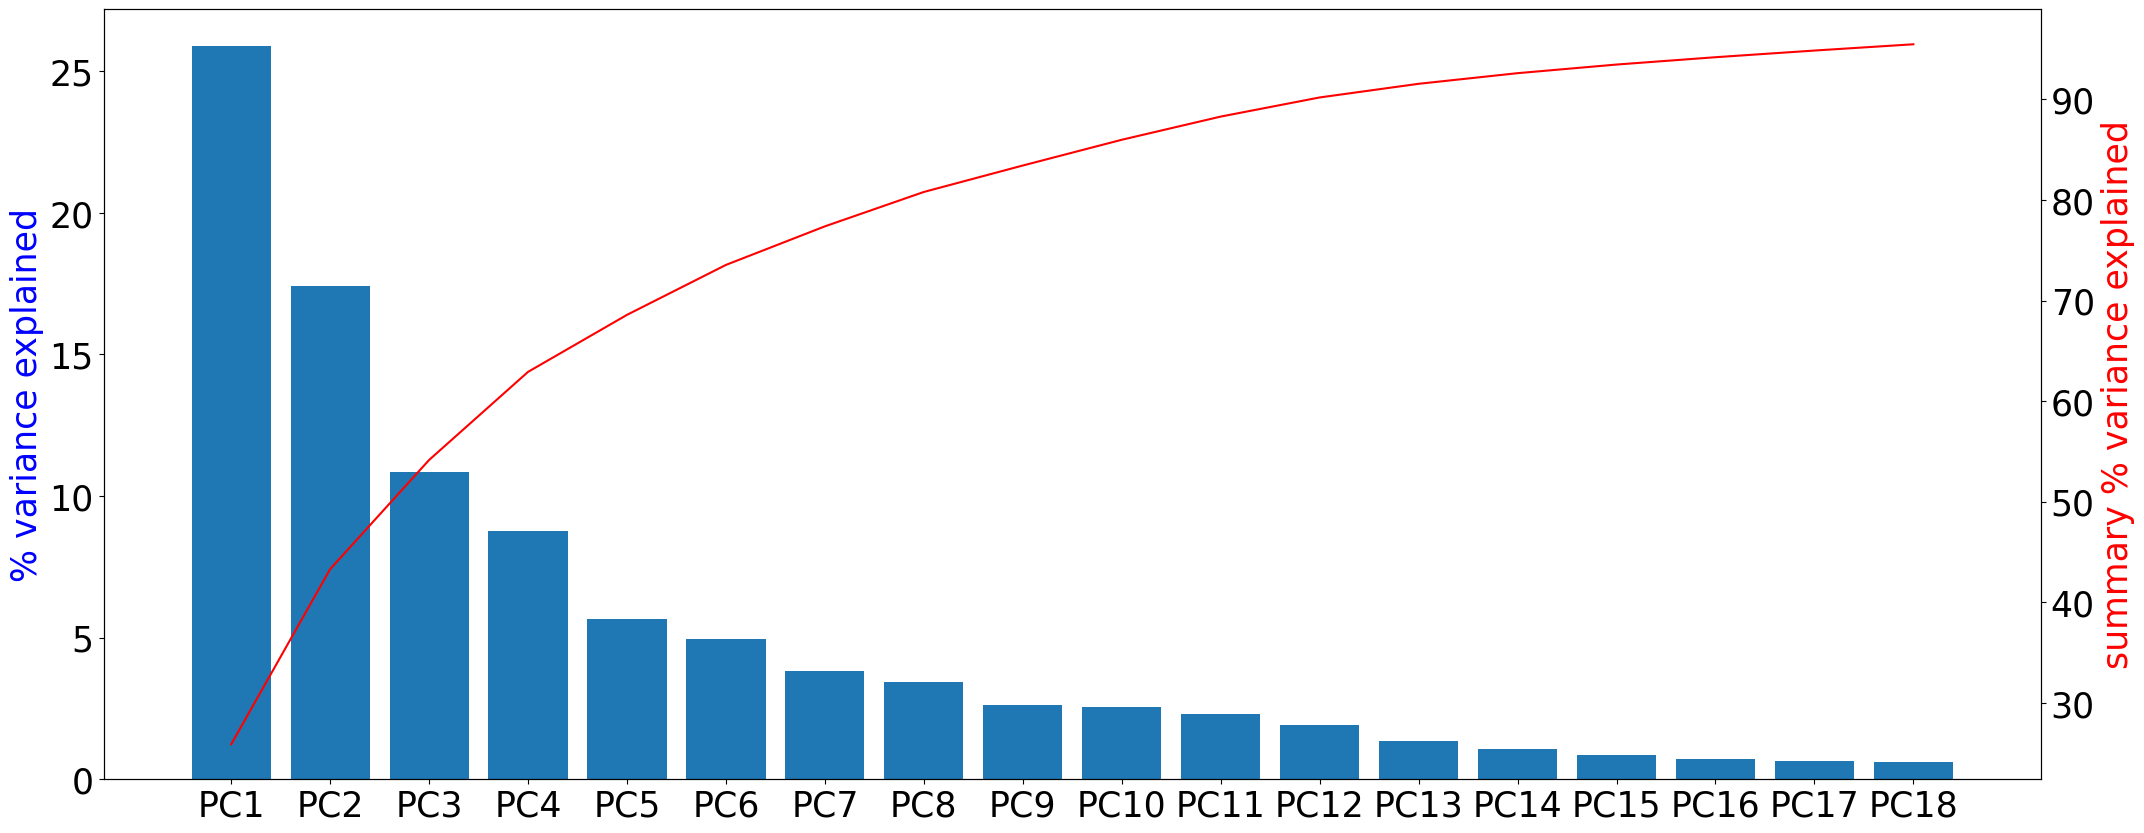

In [116]:
pcs = [f"PC{n}" for n in range(1, xx.shape[1]+1)]
fig, ax = plt.subplots(figsize=(25,10))
ax.bar(pcs, pca.explained_variance_ratio_*100)
ax2 = ax.twinx()
ax2.plot(pcs, (pca.explained_variance_ratio_*100).cumsum(), c="r")
ax.set_ylabel("% variance explained", color="b")
ax2.set_ylabel("summary % variance explained", color="r")

In [117]:
fig.savefig("scree_plot_fqd.pdf")

### 2D

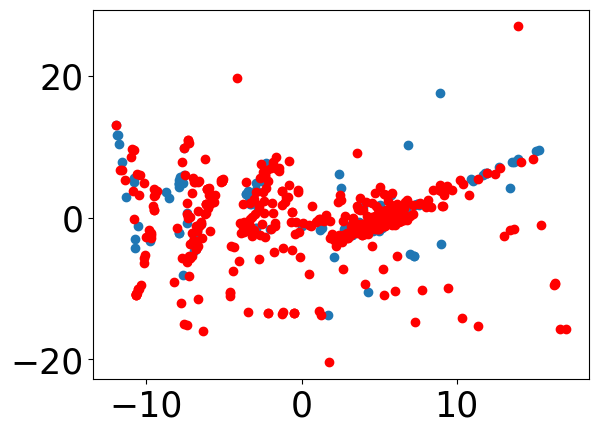

In [118]:
fig, ax = plt.subplots()
pca_df_ones = pca_df[(yy==1).values]
pca_df_zeros = pca_df[(yy==0).values]
ax.scatter(pca_df_ones["PC1"], pca_df_ones["PC2"])
ax.scatter(pca_df_zeros["PC1"], pca_df_zeros["PC2"], c="r")

### 3D

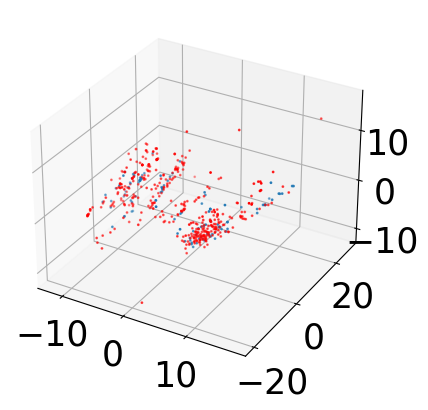

In [119]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
ax.scatter(pca_df_ones["PC1"], pca_df_ones["PC2"], pca_df_ones["PC3"], s=1)
ax.scatter(pca_df_zeros["PC1"], pca_df_zeros["PC2"], pca_df_zeros["PC3"], c="r", s=1)

In [120]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,4.284421,-1.872287,-4.796424,-0.626301,-1.359081,0.597452,-0.352307,0.429814,0.351305,-0.376277,-0.595309,-1.019267,-0.601788,0.429571,0.506501,-0.469198,0.618595,0.620515
1,-5.934656,4.200080,3.749729,-1.543506,-1.480642,-1.369324,6.436511,-0.565176,0.331875,-2.412641,1.059431,1.070739,-1.863934,1.144334,3.453451,-0.362942,2.399716,1.483245
2,4.931752,-1.607893,-2.490060,-1.036759,0.158460,-1.215622,-0.946162,0.653389,-0.087209,-0.263871,-0.519242,0.753271,-1.252579,1.017350,0.389626,-1.513313,-0.244670,-0.901949
3,5.241121,0.131047,-4.819501,-1.832958,-1.139428,2.351874,3.987138,-0.696143,-1.396787,-0.278453,1.484445,0.393015,1.381625,-1.675737,-0.777835,0.606899,-0.636689,0.559179
4,-2.459377,6.422610,4.054392,-4.615230,2.854621,1.751078,-0.100034,-1.549084,1.812420,1.629034,-2.920104,-2.169199,0.218244,0.588438,-0.092901,-0.384228,0.053616,0.100555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,-0.785645,8.021462,7.295669,-4.493426,2.861271,0.856178,0.548230,-2.691541,1.847405,2.407315,-2.562164,-0.461806,0.215905,-0.048461,-0.947505,-1.607721,0.228696,1.036117
522,-6.484270,-0.847586,-0.595806,-0.721909,-3.273953,-3.538038,0.333427,1.399467,1.056271,-0.604382,1.912079,0.575568,0.807749,0.532406,-0.646239,0.655993,0.991255,-1.474448
523,5.236440,-0.123007,-3.886146,-0.969934,-0.305438,1.989422,3.365753,-0.745064,-1.512514,-0.776636,0.367656,-1.028963,0.835922,-0.358225,-1.902275,-0.122700,-0.099579,-0.302770
524,4.093970,-2.279732,-3.343239,-1.677733,-0.028353,-0.468242,-1.116615,0.920831,-0.295945,-0.483407,-0.310595,1.367286,-1.417990,0.464533,0.545493,-1.524802,-0.837315,-1.033522


In [121]:
yy

586    1
579    0
305    0
383    0
434    0
      ..
454    0
115    1
534    0
817    0
368    0
Name: class_encoded, Length: 526, dtype: int64

In [122]:
pd.concat([pca_df, yy], axis=1).to_csv("pca_df.csv")